Min: -9647541, Avg: 72534.45750708216, Max: 9094063 -> Delta 18741604
Min: -7071259, Avg: 24362.623229461755, Max: 7962791 -> Delta 15034050
Min: -648598, Avg: -640068.650141643, Max: -630779 -> Delta 17819


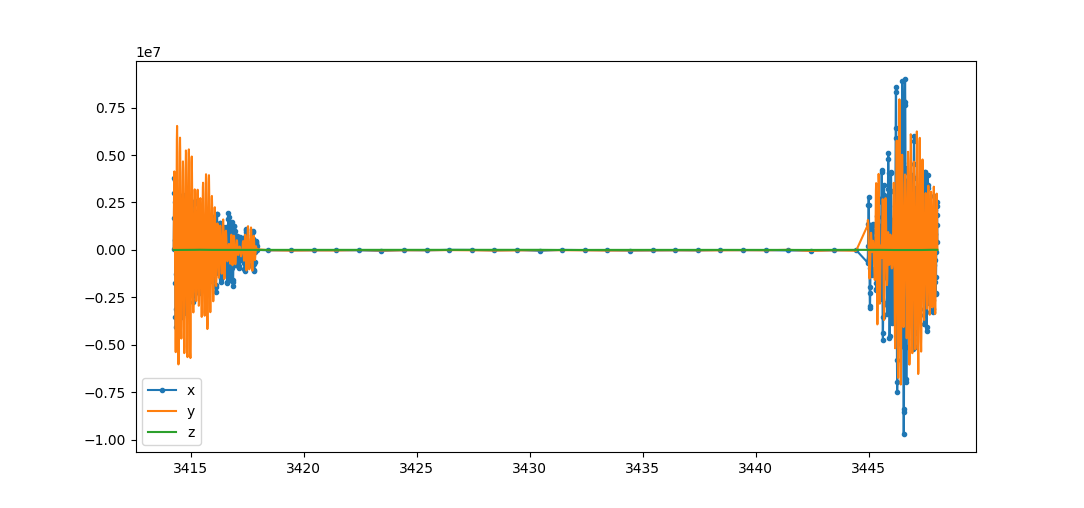

In [20]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


timestamps = []
x = []
y = []
z = []

for line in open("seismodata.txt"):    
    columns = line.strip().split(",")
    if len(columns) != 7:
        continue

    timestamps.append(int(columns[0]) / 1e6)
    x.append(int(columns[1]))
    y.append(int(columns[2]))
    z.append(int(columns[3]))
    
def zero(data):
    avg = np.mean(data)
    print(f"Min: {min(data)}, Avg: {avg}, Max: {max(data)} -> Delta {max(data) - min(data)}")
    return [v - avg for v in data]


plt.clf()
plt.plot(timestamps, zero(x), ".-", label="x")
plt.plot(timestamps, zero(y), label="y")
plt.plot(timestamps, zero(z), label="z")
plt.legend()
plt.show()